# Sampling 

## Terms of Sampling

> Confusiion among "statistics", "parameters"...etc

- <big>**Sample Statistics**</big>
  - A statistic is a characteristic of a parameter, e.g. sample mean
  - E.g. the mean weight of a random sample of 100 penguins is a statistic
    - Using the mean weight of samples to estimate mean weight population
- <big>**Population Parameter**</big>
  - A parameter is a characteristic of a population, e.g. population mean
  - E.g. the mean weight of the total population of 10,000 penguins is a parameter
- NOTEs:
  - Using sampling when analysing very large dataset (i.e. too big to load into memory)

## Probabilistic Sampling

- <big>Simple Random Sampling</big>
- <big>Stratified Random Sampling</big>
  - "Stratified" the data and then randomly sample from each strata
    1. Population are divided into subgropus called "Strata"
    2. Each subgroup is randomly sampled
- <big>Cluster Random Sampling</big>
  - Sample from random cluster
    1. Population are divided into clusters
    2. Randomly selected from the clusters as samples (all data in the selected cluster)
- <big>Systematc Random Sampling</big>
  - Ordered sampling by a given interval
    1. Population is arranged into an ordered sequence
    2. Choosing a random starting point and an interval
    3. Sample from the starting point at each interval

### Non-Probabilistic Sampling

- Convenience sampling (Only by convenience to the researcher)
- Voluntary response sampling (Only by respondents who are willingly to respond)
- Snowball sampling (Only by respondents and their close personnels)
- Purposive sampling (Only by certain research purpose)

## Sampling Distributions

> Distribution of the sampled statistic, e.g. mean of the samples

- A probabilistic distribution of a sample statistic (repeated samples)
  - I.e. all of the possible outcomes of a sample statistic 

### Sampling Variability 

- How much the estimates (from each sample) varies between samples
- **Sample Standard Deviation**  
  - Standard deviation of "a" sample 
  - E.g. a sample of 100 penguins has a mean weight of three pounds and a standard deviation of one pound
- **Standard Error of mean**
  - **"Standard Deviation" of a sample statistic**
  - Larger => the sample means are more spread out (not closer to the true population mean)
  - Formula: `Sample Standard Deviation`, divided by `Square root of Sample Size`
    - With previous example, `1 / np.sqrt(100)`

### Central Limit Theorem

- **Sampling distribution of the mean approaches a Normal Distribution as the sample size increases**
  - I.e. as sample size increases, your sampling distribution assumes the shape of a bell curve
  - In general, a sample size of 30 or more is considered sufficient
  - With enough larger sample size, the sample mean will roundly equal to population mean
- Population Distribution
  - With large enough sample, shape of the sampling distribution follows a normal distribution
    - _Even for skewed distribution_
- Pre-requirements
  - Randomization
    - sample data must be the result of random selection
  - Independence
    - sample values must be independent of each other
    - I.e. the value of one observation does not affect the value of another observation.
    - Sample size should be no larger than 10% of the total population to ensure independence(?)
      - https://www.coursera.org/learn/the-power-of-statistics/supplement/YVpN8/infer-population-parameters-with-the-central-limit-theorem
  - Sample size
    - Larger sample size, closer of the sampling distribution to a normal distribution
    - If population distribution is already roughly bell-shaped
      - Sampling distribution will still be similar to normal distribution even having a smaller sample size
   

In [1]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px

In [5]:
df = plotly.data.gapminder()
print(df.shape)
df.head()

(1704, 8)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


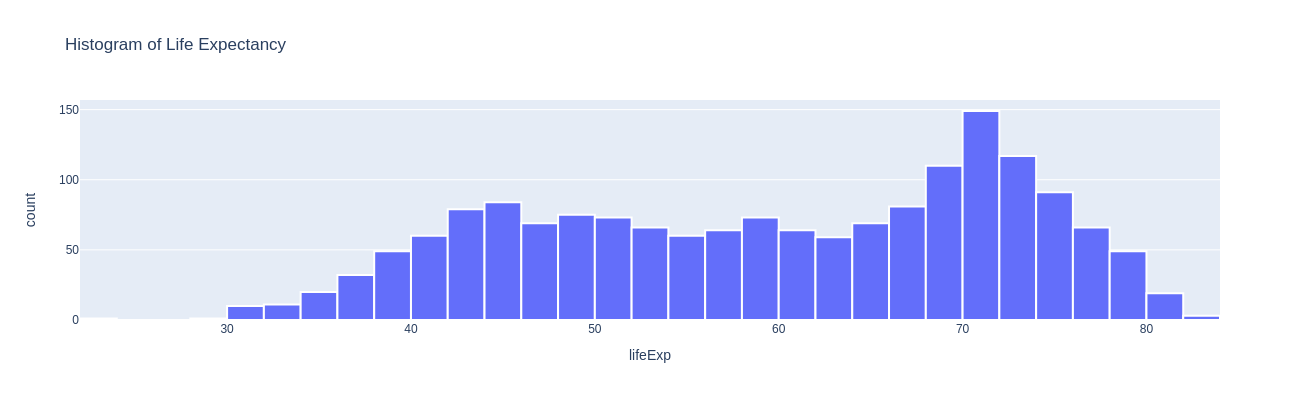

In [11]:
fig = px.histogram(df, "lifeExp", height=400, title="Histogram of Life Expectancy")
fig.update_traces(marker_line_color="white", marker_line_width=2)
fig.show()
# not normally distributed

> Sampling and Central Limit Theorem

- Sampling distribution of the mean approaches a Normal Distribution as the sample size increases

In [27]:
n_samples = 1000
sample_size = 50

sample_means = []
for _ in range(n_samples):
    # sample_mean = df.sample(n=sample_size, replace=False).lifeExp.mean()
    sample_mean = df.sample(n=sample_size, replace=True).lifeExp.mean()
    sample_means.append(sample_mean)
len(sample_means)

1000

,count,mean,std,min,25%,50%,75%,max
lifeExp_sample_mean,1000.0,59.452167,1.85299,53.35674,58.157761,59.43482,60.78166,65.1852


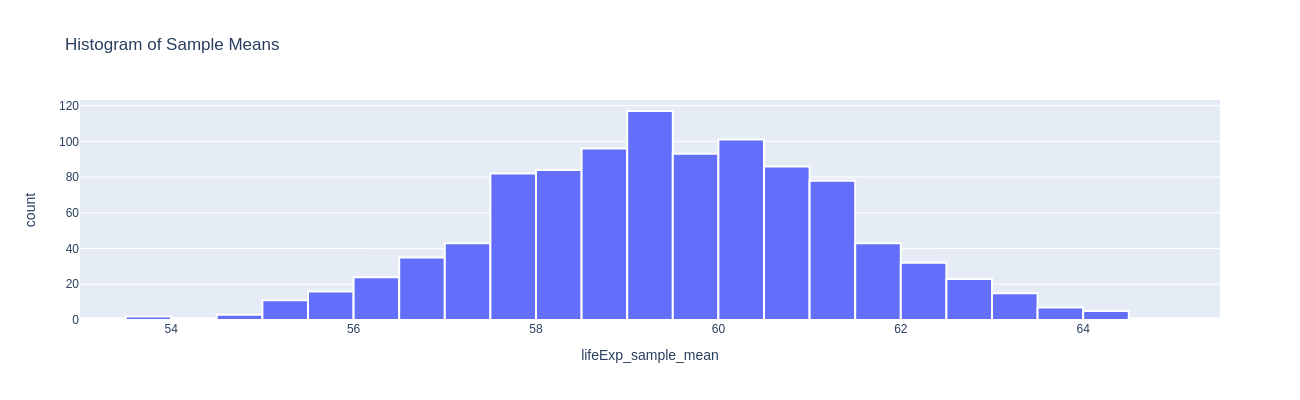

In [34]:
tmp = pd.DataFrame(sample_means, columns=["lifeExp_sample_mean"])
display(tmp["lifeExp_sample_mean"].describe().to_frame().T)
fig = px.histogram(tmp, "lifeExp_sample_mean", nbins=50, height=400, title="Histogram of Sample Means")
fig.update_traces(marker_line_color="white", marker_line_width=2)
fig.show()
# sample means are somewhat normally distributed, with 50 bins

> Standard Error of Sample Means

- Sample-to-sample variability of the sample statistic
- A numerical measure of sampling variability
- From single sample, we can estimate the sampling variability with Standard Error
  - `Sample Standard Deviation`, divided by `Square Root of (Sample Size)`

In [30]:
sample = df.sample(n=sample_size, replace=True)

standard_error = sample["lifeExp"].std() / np.sqrt(sample.shape[0])
standard_error
# this is the estimated sample to sample variability

1.6671647459843493

> Put Everything Together

- Normal Curve of Central Limit Theorem
- Population Mean
- Sample Mean of one random sample
- Mean of samples means (1000 random samples)
- Histogram of Sample means (1000 random samples)

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
sns.set()

In [45]:
# single sample 
sample.shape

(50, 8)

In [54]:
population_mean = df.lifeExp.mean()
population_mean 

59.474439366197174

In [58]:
# sample means of 1000 samples
tmp = pd.DataFrame(sample_means, columns=["sample_means"])

# PDF of normal distribution with population mean and estimated standard erorr
x = np.linspace(tmp.sample_means.min(), tmp.sample_means.max(), 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)

tmp.shape, x.shape, p.shape

((1000, 1), (100,), (100,))

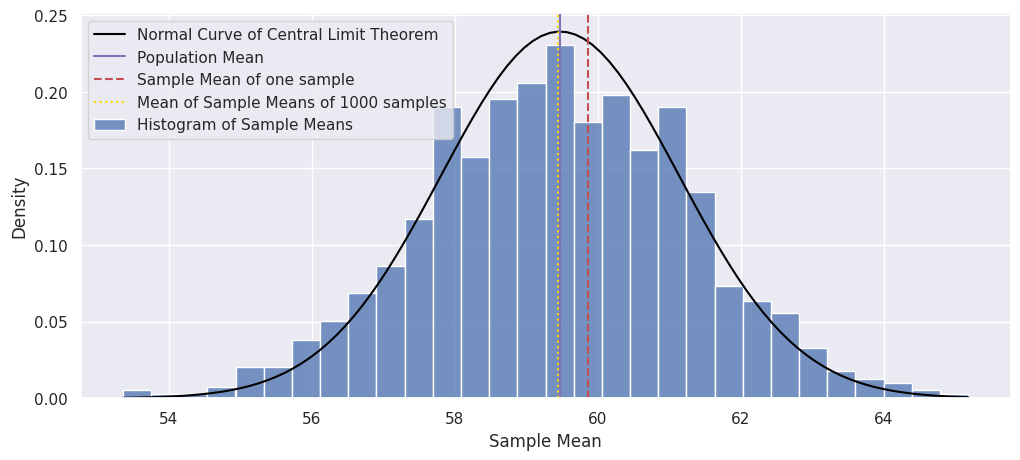

In [67]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(tmp.sample_means.values, bins=30, stat="density", label="Histogram of Sample Means", ax=ax)
sns.lineplot(x=x, y=p, color="black", label="Normal Curve of Central Limit Theorem")

ax.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'Population Mean')
ax.axvline(x=sample_mean, color='r', linestyle = '--', label = 'Sample Mean of one sample')
ax.axvline(x=tmp.sample_means.mean(), color='gold', linestyle = ':', label='Mean of Sample Means of 1000 samples')

ax.set_xlabel('Sample Mean')
ax.set_ylabel('Density')
ax.legend()

fig.show()

- Histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
- Estimate based on one particular sample (red dashed line) is off-center
  - This is expected due to sampling variability
- Population mean (Purpld solid line) and the mean of the sample means (Gold dotted line) overlap,
  - meaning that they are essentially equal to each other.

### Population Proportion

- Percentage of individuals or elements in a population that shares a cerain characteristic
  - E.g. percentage of all employees like the food in cafeteria?
  - E.g. percentage of all visitors who made a purchase before leaving
- Using sample proportion to estimate population proportion
- CTL also applies to sampling proportion distribution
- **Standard Error of proportion**
  - **"Standard Deviation" of a sample proportion**
  - Formula: `Square rooot` of
    - `estimate population proportion` times `1 - estimate population propotion`, divided by `sample size`
  - E.g. Sample size of 100, and estimated population proportion is 0.1 (1 out of 100 prefer sneaker over slipper)
    - Standard error will be `np.sqrt(0.1 * 0.9 / 100) = 0.03`
- NEXT: using the standard erorr to get Confidence Interval

In [1]:
import numpy as np
np.sqrt(0.1 * .9 /100)

0.030000000000000002